## 17F Request RRF funds

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv('17F_Request-RRF_funds_1_ (1).xlsx - RRF Funds.csv')
df1.head()

,Applicant Street,Applicant Zip Code,Type of Award,Race and Ethnicity,Primary Language Spoken,Gender Identity,Do you have a mobile housing voucher?,Receive SNAP/EBT Benefits?,How many in household?,Total Monthly Income all sources,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,NaN,2215.0,Rental Arrears,NaN,English,Not reported,NaN,NaN,8.0,6000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2118.0,NaN,Black,English,Male,No,No,1.0,1600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,2128.0,Rental Arrears,White,Spanish,Female,NaN,NaN,4.0,9000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,East St,2127.0,NaN,White,English,Male,No,Yes,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dudley St,2125.0,NaN,Decline to answer,English,Female,No,No,2.0,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
"""
Explore the difference in the city’s responses to service requests based on demographics: 
income, home ownership level, race/ethnicity.
For example, % of requests closed/completed, speed of response/ closure? How does this vary by demographics? Race, ethnicity, income?  
"""
df1.columns

Index(['Applicant Street', 'Applicant Zip Code', 'Type of Award',
       'Race and Ethnicity', 'Primary Language Spoken', 'Gender Identity',
       'Do you have a mobile housing voucher?', 'Receive SNAP/EBT Benefits?',
       'How many in household?', 'Total Monthly Income all sources',
       'Are you currently employed?', 'Total Amount Awarded',
       'Date Payment Issued', 'Disposition of case', 'If ineligible, why?',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

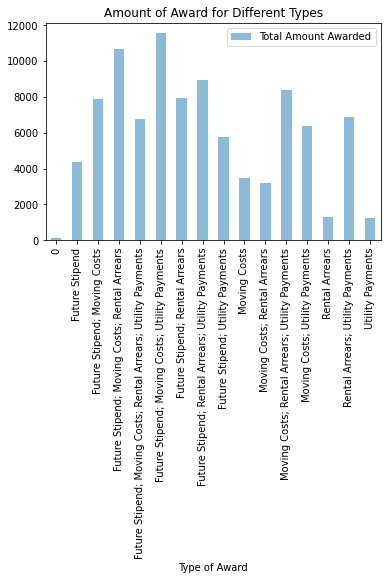

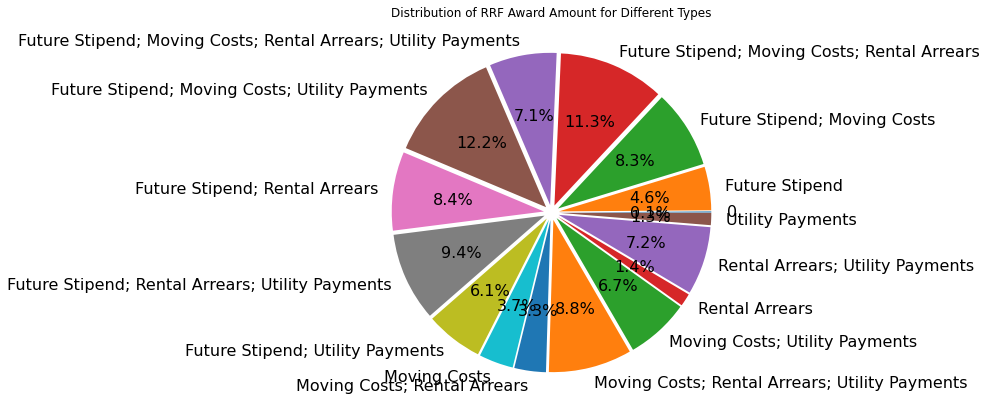

In [3]:
df1 = df1.fillna(0)

temp = df1[['Total Amount Awarded', 'Type of Award']].groupby('Type of Award').mean()
temp.plot(kind='bar', legend=True, alpha=.5)
plt.title("Amount of Award for Different Types")
plt.show()

print('\n\n')

plt.figure(figsize=(7,7))
plt.pie(temp['Total Amount Awarded'], labels = temp.index.to_list(), explode = [0.05]*(len(temp)) ,autopct = '%1.1f%%' ,textprops = {'fontsize' : 16 })
plt.title("Distribution of RRF Award Amount for Different Types")
plt.show() 

From the graph above, we could find that 'Future Stipend; Rental Arrears; Utility Payments' has the higest funds and then is 'Future Stipend; Rental Arrears', whose number of funds is really closed to the highest funds. The 'Rental Arrears' and 'Utility Payments' have the lowest funds, which are 1.3% and 1.4% respectively.

In [4]:
df1['Type of Award'].unique()

array(['Rental Arrears', 0, 'Future Stipend',
       'Future Stipend; Rental Arrears',
       'Future Stipend; Rental Arrears; Utility Payments',
       'Utility Payments', 'Future Stipend; Moving Costs; Rental Arrears',
       'Rental Arrears; Utility Payments', 'Moving Costs',
       'Future Stipend; Utility Payments', 'Future Stipend; Moving Costs',
       'Future Stipend; Moving Costs; Utility Payments',
       'Future Stipend; Moving Costs; Rental Arrears; Utility Payments',
       'Moving Costs; Utility Payments',
       'Moving Costs; Rental Arrears; Utility Payments',
       'Moving Costs; Rental Arrears'], dtype=object)

In [16]:
df1.columns

Index(['Applicant Street', 'Applicant Zip Code', 'Type of Award',
       'Race and Ethnicity', 'Primary Language Spoken', 'Gender Identity',
       'Do you have a mobile housing voucher?', 'Receive SNAP/EBT Benefits?',
       'How many in household?', 'Total Monthly Income all sources',
       'Are you currently employed?', 'Total Amount Awarded',
       'Date Payment Issued', 'Disposition of case', 'If ineligible, why?',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

In [5]:
len(df1['Race and Ethnicity'].unique())
df1.shape

(20399, 29)

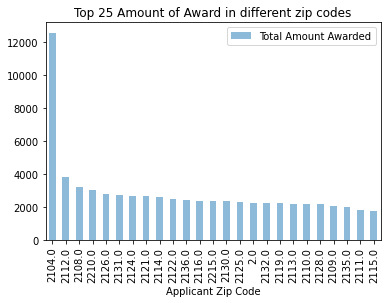

The zip codes with amount of award are 0


0.0        4830
2128.0     1477
2124.0      976
2121.0      744
2119.0      663
           ... 
1742.0        1
1887.0        1
92368.0       1
1860.0        1
2767.0        1
Name: Applicant Zip Code, Length: 258, dtype: int64

In [6]:
df1 = df1.fillna(0)
temp = df1[['Total Amount Awarded', 'Applicant Zip Code']].groupby('Applicant Zip Code').mean()
temp.nlargest(25, 'Total Amount Awarded').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 Amount of Award in different zip codes")
plt.show()

print('The zip codes with amount of award are 0')
temp = df1.loc[df1['Total Amount Awarded'] == 0, 'Applicant Zip Code']
temp = pd.DataFrame(temp)
temp['Applicant Zip Code'].value_counts()

From the result, we could find that the zip code 2104 has the higest amount of award, While more than 250 zip codes didn't receive award.

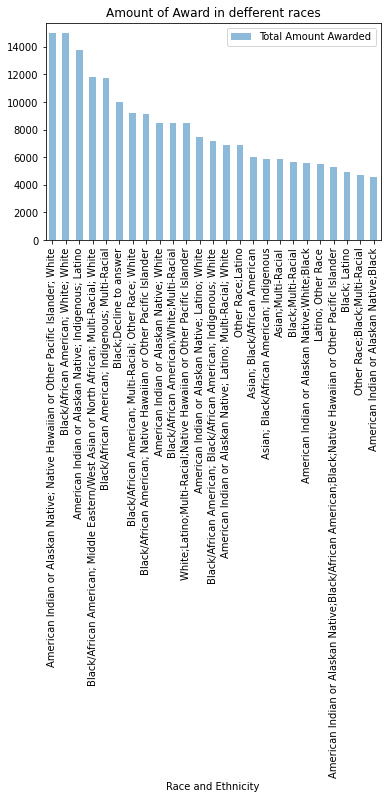

,Total Amount Awarded
Race and Ethnicity,
0,57.268357
American Indian or Alaskan Native,2262.720000
American Indian or Alaskan Native; Asian; Black; Black/African American; Indigenous; Multi-Racial; Native Hawaiian or Other Pacific Islander; Other Race; Pacific Islander,0.000000
American Indian or Alaskan Native; Black/African American,2625.636364
American Indian or Alaskan Native; Black/African American; Indigenous; Native Hawaiian or Other Pacific Islander; White,0.000000
...,...
White;Latino;Multi-Racial,0.000000
White;Latino;Multi-Racial;Native Hawaiian or Other Pacific Islander,8500.000000
White;Middle Eastern/West Asian or North African,2322.668000


In [7]:
temp = df1[['Total Amount Awarded', 'Race and Ethnicity']].groupby('Race and Ethnicity').mean()
temp.nlargest(25, 'Total Amount Awarded').plot(kind='bar', legend=True, alpha=.5)
plt.title("Amount of Award in defferent races")
plt.show()

temp

From the graph above, we could find that the races combination of 'American Indian or Alaskan Native; Black/African American; Indigenous; Native Hawaiian or Other Pacific Islander; White' has the largest amount of award, and then is ''Black/African American; White; White'.

In [8]:
from re import sub
from decimal import Decimal
df1 = df1.fillna(0)
temp = df1[~df1['Total Monthly Income all sources'].str.contains(r'\d+')]
df1.loc[~df1['Total Monthly Income all sources'].str.contains(r'\d+'), 'Total Monthly Income all sources'] = '0'
df1['Total Monthly Income all sources'] = df1['Total Monthly Income all sources'].fillna('0').apply(lambda x: Decimal(sub(r'[^\d.]', '', x))).astype(float)

In [10]:
print(df1['Total Monthly Income all sources'].nlargest(10))
print(df1['Total Monthly Income all sources'].nsmallest(10))

20398    8.573648e+09
20397    9.489547e+08
20396    1.661400e+06
20395    7.800000e+05
20394    4.500000e+05
20393    4.350000e+05
10131    4.307150e+05
8428     4.000000e+05
6240     3.500000e+05
20392    3.200000e+05
Name: Total Monthly Income all sources, dtype: float64
3     0.0
17    0.0
27    0.0
30    0.0
36    0.0
37    0.0
39    0.0
40    0.0
48    0.0
51    0.0
Name: Total Monthly Income all sources, dtype: float64


In [130]:
print(df1['Total Amount Awarded'][20398])
print(df1['Total Amount Awarded'][20397])

0.0
0.0


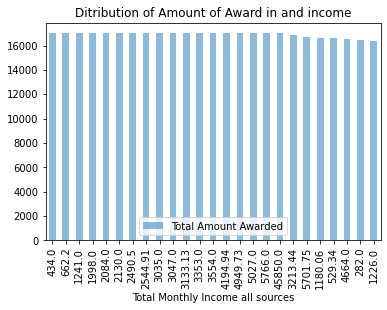

,Total Amount Awarded
Total Monthly Income all sources,
0.000000e+00,1492.739737
1.000000e-02,326.680000
2.000000e-02,0.000000
2.500000e-01,0.000000
1.000000e+00,125.000000
...,...
4.500000e+05,0.000000
7.800000e+05,0.000000
1.661400e+06,0.000000


In [11]:
temp = df1[['Total Amount Awarded', 'Total Monthly Income all sources']].groupby('Total Monthly Income all sources').mean()
temp.nlargest(25, 'Total Amount Awarded').plot(kind='bar', legend=True, alpha=.5)
plt.title("Ditribution of Amount of Award in and income")
plt.show()

temp

From the result, we could find that the zip code with monthly income 434 and 662 has the highest funds. We also analyzed the zip codes with highest income, we found that the top 2 zip codes with highest income didn't receive funds.

In [12]:
df_test = df1.copy()
df_test.columns

Index(['Applicant Street', 'Applicant Zip Code', 'Type of Award',
       'Race and Ethnicity', 'Primary Language Spoken', 'Gender Identity',
       'Do you have a mobile housing voucher?', 'Receive SNAP/EBT Benefits?',
       'How many in household?', 'Total Monthly Income all sources',
       'Are you currently employed?', 'Total Amount Awarded',
       'Date Payment Issued', 'Disposition of case', 'If ineligible, why?',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

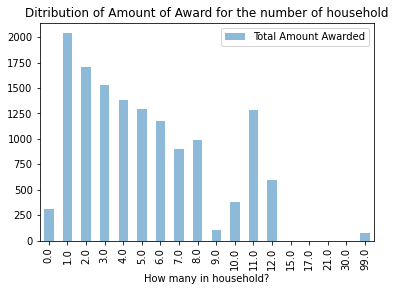

In [137]:
df1[['Total Amount Awarded', 'How many in household?']].groupby('How many in household?').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Ditribution of Amount of Award for the number of household")
plt.show()

From the result we found that the household of 1 has the higest funds and then is 2.

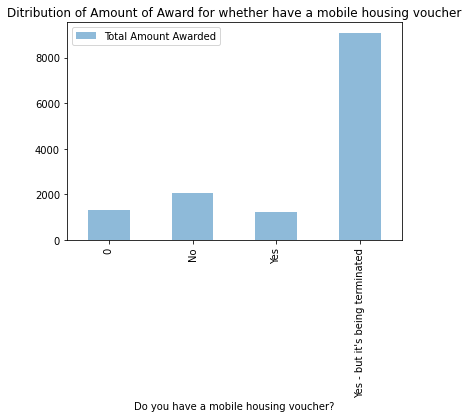

In [13]:
df1[['Total Amount Awarded', 'Do you have a mobile housing voucher?']].groupby('Do you have a mobile housing voucher?').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Ditribution of Amount of Award for whether have a mobile housing voucher")
plt.show()

From the result we could find that the type of 'Yes but it's being terminated' has the highest funds.

0      47.536644
Yes    27.962155
No     24.501201
Name: Receive SNAP/EBT Benefits?, dtype: float64

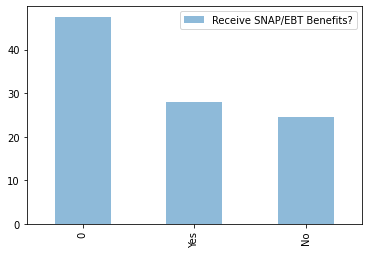

In [66]:
a = df1['Receive SNAP/EBT Benefits?'].value_counts()
a = a / len(df1['Receive SNAP/EBT Benefits?']) * 100

a.plot(kind='bar', legend=True, alpha=.5)
a

From the graph we could find that the percentage of cases that have receive SNAP/EBT Benefits is 27.96%, while the percentage of cases that have not receive SNAP/EBT Benefits is 24.5%.

In [53]:
"""
Explore the difference in the city’s responses to service requests based on demographics: 
income, home ownership level, race/ethnicity.
For example, % of requests closed/completed, speed of response/ closure? How does this vary by demographics? Race, ethnicity, income?  
"""
df1.columns

Index(['Applicant Street', 'Applicant Zip Code', 'Type of Award',
       'Race and Ethnicity', 'Primary Language Spoken', 'Gender Identity',
       'Do you have a mobile housing voucher?', 'Receive SNAP/EBT Benefits?',
       'How many in household?', 'Total Monthly Income all sources',
       'Are you currently employed?', 'Total Amount Awarded',
       'Date Payment Issued', 'Disposition of case', 'If ineligible, why?',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

Ineligible                            29.927938
Awaiting tenant materials             26.261091
Approved                              25.736556
Tenant non-responsive                  9.534781
Landlord and tenant non-responsive     2.500123
0                                      2.166773
Opted for RAFT                         1.024560
Awaiting landlord materials            0.995147
Pending New Lease                      0.524536
Pending approval                       0.480416
Opted out                              0.401980
Pending offer letter                   0.142164
Landlord refused participation         0.127457
Landlord non-responsive                0.102946
In recertification                     0.044120
Transferred/referred                   0.014707
None                                   0.014707
Name: Disposition of case, dtype: float64

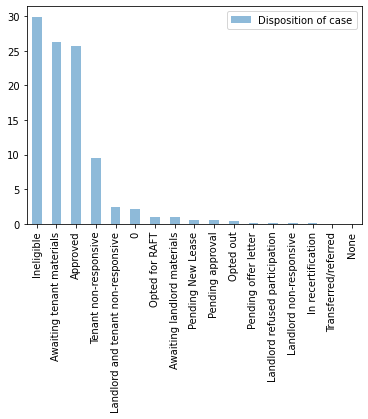

In [67]:
a = df1['Disposition of case'].value_counts()
a = a / len(df1['Disposition of case']) * 100

a.plot(kind='bar', legend=True, alpha=.5)
a

Frome the results above we could find that the percentage of the cases that have been Approved is 25.73%, while the cases that are 'Landlord refused participation' is 0.142%.